Step 1: Loading Libraries...

In [1]:
%pip install kagglehub

  Using cached kagglehub-0.3.4-py3-none-any.whl.metadata (22 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached kagglehub-0.3.4-py3-none-any.whl (43 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from PIL import Image
import kagglehub

/workspaces/Machine-Learning/.conda/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Step 2: Loading Dataset...

In [3]:
print("Downloading dataset...")
path = kagglehub.dataset_download("ambarish/breakhis")
print("Path to dataset files:", path)

100%|██████████| 3.99G/3.99G [04:16<00:00, 16.6MB/s] 

Extracting files...


Path to dataset files: /home/codespace/.cache/kagglehub/datasets/ambarish/breakhis/versions/4


Step 3: Defining a function to load images and preprocess them

In [4]:
def load_images(dataset_path, target_size=(64, 64)):
    images = []
    labels = []
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(".png"):
                
                # Load the image
                img_path = os.path.join(root, file)
                img = Image.open(img_path).resize(target_size)
                img_array = np.array(img).flatten()  # Flatten the image into a 1D array
                images.append(img_array)

                # Extract the label from the filename
                label = "Benign" if "B" in file.split("_")[1] else "Malignant"
                labels.append(label)
    return np.array(images), np.array(labels)

Step 4: Loading the images and labels

In [5]:
print("Loading images...")
X, y = load_images(path)  # Use the downloaded path
print(f"Loaded {X.shape[0]} images.")

Loading images...
Loaded 7909 images.


Step 5: Scale the features

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Step 6: Applying k-Means Clustering

In [7]:
kmeans = KMeans(n_clusters=2, random_state=42)  # 2 clusters: Benign and Malignant
kmeans.fit(X_scaled)
clusters = kmeans.labels_

Step 7: Applying PCA for 2D visualization

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

Step 8: Plotting the Clusters

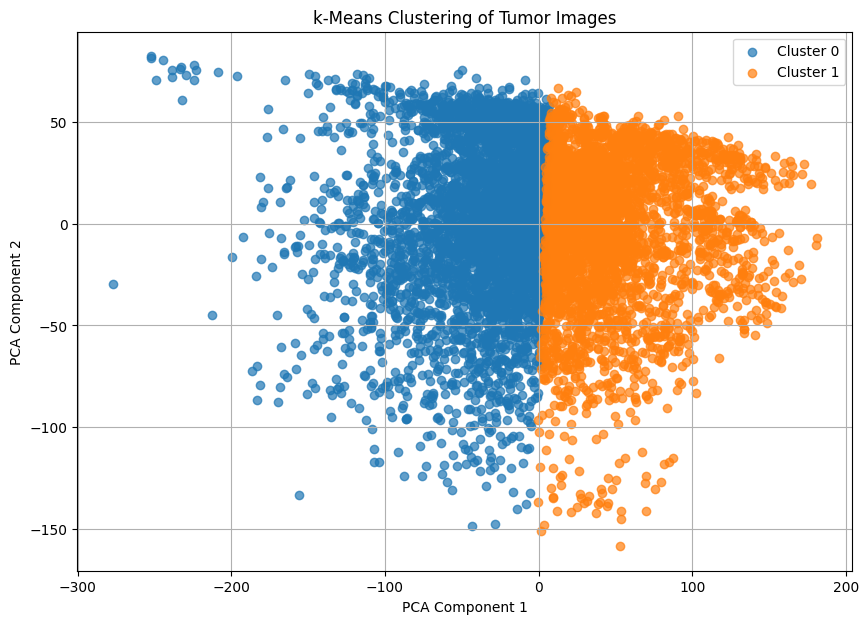

In [9]:
plt.figure(figsize=(10, 7))
for cluster in np.unique(clusters):
    plt.scatter(X_pca[clusters == cluster, 0], X_pca[clusters == cluster, 1],
                label=f"Cluster {cluster}", alpha=0.7)
plt.title("k-Means Clustering of Tumor Images")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()